# Dataset fingerprints

## Imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import itertools
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import pandas as pd

from kinsim_structure.encoding import Fingerprint
from kinsim_structure.similarity import calculate_similarity

In [4]:
pd.set_option('display.max_rows', 100)

## IO paths

In [5]:
path_to_data = Path('/') / 'home' / 'dominique' / 'Documents' / 'data' / 'kinsim' / '20190724_full'
path_to_kinsim = Path('/') / 'home' / 'dominique' / 'Documents' / 'projects' / 'kinsim_structure'
path_to_results = path_to_kinsim / 'results'
path_to_fingerprints = path_to_results / 'fingerprints'

metadata_path = path_to_data / 'postprocessed' / 'klifs_metadata_postprocessed.csv'

## Load metadata for failed fingerprint generation

In [6]:
with open(path_to_fingerprints / 'fingerprints_error_entries.p', 'rb') as f:
    errors = pickle.load(f)
    
errors = pd.DataFrame(errors)

In [7]:
len(errors)

3

In [8]:
errors

,Unnamed: 0,index,kinase,family,groups,pdb_id,chain,alternate_model,species,ligand_orthosteric_name,...,dfg,ac_helix,rmsd1,rmsd2,qualityscore,pocket,resolution,missing_residues,missing_atoms,full_ifp
1000,1005,1259,CHK1,CAMKL,CAMK,4hyh,A,B,Human,"2-(6-methoxy-1-oxo-1,3-dihydro-2H-isoindol-2-y...",...,in,in,0.779,2.097,8.0,QTLGEGAYGEVQLVAVKIVNIKKEICINKMLNENVVKFYGHYLFLE...,1.7,0,0,0000000000000010000000000000000000000000000000...
1002,1007,1317,CHK1,CAMKL,CAMK,4jik,A,-,Human,2-(4-chlorophenyl)-8-[(3S)-piperidin-3-ylamino...,...,in,in,0.779,2.028,8.7,QTLGEGA_GEVQLVAVKIVNIKKEICINKMLNENVVKFYGHYLFLE...,1.9,1,9,0000000000000010000000000000100000010000000000...
2479,2490,747,LOK,STE20,STE,2j7t,A,A,Human,"(3Z)-N-(3-CHLOROPHENYL)-3-({3,5-DIMETHYL-4-[(4...",...,in,in,0.776,2.105,8.0,GELGDGAFGKVYKAAAKVIDYIVEIEILATCDPYIVKLLGAWIMIE...,2.0,0,26,0000000000000010000000000000000000000000000000...


## Fingerprints type 1 (physchem + distances)

### DataFrames

In [9]:
fp1 = pd.read_csv(path_to_fingerprints / 'fingerprints_parallelized.csv')

In [10]:
fp1.shape

(329375, 15)

In [11]:
(3878 - len(errors)) * 85

329375

In [12]:
fp1.head()

,Unnamed: 0,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure,distance_to_centroid,distance_to_hinge_region,distance_to_dfg_region,distance_to_front_pocket,metadata_index,molecule_code
0,1,2.0,0.0,2.0,-1.0,0.0,0.0,94.16,0.296296,17.19,12.80,19.08,14.13,0,HUMAN/AAK1_4wsq_altA_chainB
1,2,1.0,0.0,0.0,0.0,0.0,1.0,21.29,0.344828,15.09,11.64,16.48,11.69,0,HUMAN/AAK1_4wsq_altA_chainB
2,3,2.0,0.0,0.0,0.0,0.0,1.0,27.98,0.750000,12.41,9.24,15.13,8.24,0,HUMAN/AAK1_4wsq_altA_chainB
3,4,1.0,0.0,0.0,0.0,0.0,1.0,22.51,0.451613,11.80,10.34,13.67,7.22,0,HUMAN/AAK1_4wsq_altA_chainB
4,5,2.0,0.0,2.0,-1.0,0.0,0.0,25.87,0.142857,12.80,12.41,12.79,9.24,0,HUMAN/AAK1_4wsq_altA_chainB


### Class instances

In [13]:
with open(path_to_fingerprints / 'fingerprints_parallelized.p', 'rb') as f:
    fingerprints = pickle.load(f)
    
print(len(fingerprints))
fingerprints = [i for i in fingerprints if i is not None]
print(len(fingerprints))

In [14]:
print(len(fingerprints))
fingerprints = [i for i in fingerprints if i is not None]
print(len(fingerprints))

3878
3875


## Fingerprints type 2 (physchem + moments)

In [15]:
fp2 = []

for index, fingerprint in enumerate(fingerprints):
    
    fingerprint.features.fillna(value=pd.np.nan, inplace=True)
    
    fp2.append(fingerprint.get_usr_fingerprint())

In [16]:
moments_df = pd.concat([i['moments'] for i in fp2], axis=0)

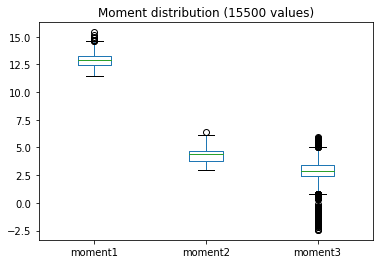

In [17]:
box_plot = moments_df[
    'moment1 moment2 moment3'.split()
].plot(
    kind='box',
    title=f'Moment distribution ({len(moments_df)} values)'
)

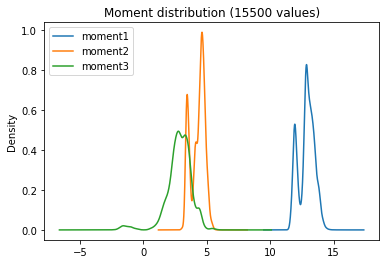

In [18]:
box_plot = moments_df[
    'moment1 moment2 moment3'.split()
].plot(
    kind='density',
    title=f'Moment distribution ({len(moments_df)} values)'
)

## Fingerprints type 1 - normalization

In [19]:
fp1_norm = []

for fingerprint in fingerprints:
    
    fp1_norm.append(fingerprint.normalize_physchem_distances())

In [20]:
fp1_norm_df = pd.concat(fp1_norm)

In [21]:
fp1_norm_df.head()

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure,distance_to_centroid,distance_to_hinge_region,distance_to_dfg_region,distance_to_front_pocket,metadata_index,molecule_code
1,0.5,0.0,1.0,0.0,0.0,0.0,0.523111,0.296296,0.491143,0.365714,0.545143,0.403714,0,HUMAN/AAK1_4wsq_altA_chainB
2,0.0,0.0,0.0,0.5,0.0,1.0,0.118278,0.344828,0.431143,0.332571,0.470857,0.334000,0,HUMAN/AAK1_4wsq_altA_chainB
3,0.5,0.0,0.0,0.5,0.0,1.0,0.155444,0.750000,0.354571,0.264000,0.432286,0.235429,0,HUMAN/AAK1_4wsq_altA_chainB
4,0.0,0.0,0.0,0.5,0.0,1.0,0.125056,0.451613,0.337143,0.295429,0.390571,0.206286,0,HUMAN/AAK1_4wsq_altA_chainB
5,0.5,0.0,1.0,0.0,0.0,0.0,0.143722,0.142857,0.365714,0.354571,0.365429,0.264000,0,HUMAN/AAK1_4wsq_altA_chainB


In [22]:
len(fp1_norm)

3875

## All-against-all comparison

### Get molecule pairs

In [36]:
with open(path_to_fingerprints / 'fingerprints_parallelized.p', 'rb') as f:
    fingerprints = pickle.load(f)
    
print(len(fingerprints))
fingerprints = [i for i in fingerprints if i is not None]
print(len(fingerprints))

3878
3875


In [37]:
pairs = []

for i, j in itertools.combinations(fingerprints, 2):
    pairs.append([i, j])

In [38]:
len(pairs)

7505875

In [32]:
scores = []

for pair in pairs[:300]:

    score = calculate_similarity(
        pair[0].normalize_physchem_distances().iloc[:, 0:12], 
        pair[1].normalize_physchem_distances().iloc[:, 0:12]
    )
    
    scores.append(
        [
            pair[0].molecule_code, 
            pair[1].molecule_code, 
            score
        ]
    )

In [33]:
len(scores)

300

In [34]:
scores_df = pd.DataFrame(
    scores,
    columns='molecule1 molecule2 score'.split()
)

In [35]:
scores_df.head()

,molecule1,molecule2,score
0,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/AAK1_5l4q_altA_chainA,0.978635
1,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/AAK1_5te0_chainA,0.977476
2,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/ABL1_2f4j_chainA,0.892913
3,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/ABL1_2g1t_chainA,0.889497
4,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/ABL1_2g2i_chainA,0.887106


## Manhattan `ZeroDivisionError`

In [45]:
error_pair_id = 'HUMAN/PLK1_5ta6_altB_chainA HUMAN/SgK495_5l2q_altB_chainB'.split()
error_pair_id

['HUMAN/PLK1_5ta6_altB_chainA', 'HUMAN/SgK495_5l2q_altB_chainB']

In [46]:
error_pair = [i for i in fingerprints if i.molecule_code in error_pair_id]

In [47]:
error_pair

In [52]:
calculate_similarity(
    error_pair[0].normalize_physchem_distances().iloc[:, 0:12],
    error_pair[1].normalize_physchem_distances().iloc[:, 0:12],
)

0.7342218113691678

In [53]:
a=pd.DataFrame([[None, 1], [1,2]])

In [58]:
a.isna().all()

0    False
1    False
dtype: bool

In [61]:
error_pair[1].features

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure,distance_to_centroid,distance_to_hinge_region,distance_to_dfg_region,distance_to_front_pocket,metadata_index,molecule_code
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3340,HUMAN/SgK495_5l2q_altB_chainB
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3340,HUMAN/SgK495_5l2q_altB_chainB
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3340,HUMAN/SgK495_5l2q_altB_chainB
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3340,HUMAN/SgK495_5l2q_altB_chainB
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3340,HUMAN/SgK495_5l2q_altB_chainB
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3340,HUMAN/SgK495_5l2q_altB_chainB
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3340,HUMAN/SgK495_5l2q_altB_chainB
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3340,HUMAN/SgK495_5l2q_altB_chainB
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3340,HUMAN/SgK495_5l2q_altB_chainB
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3340,HUMAN/SgK495_5l2q_altB_chainB


## Plot modified Manhattan values 
For physchem vs. spatial bits